In [1]:
!pip install xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('people.csv')
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [5]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [6]:
d=df.loc[:,df.columns!='left']
d['Churn']=df['left']
d.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept,salary,Churn
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.37,0.52,2,159,3,0,0,sales,low,1
4,0.41,0.50,2,153,3,0,0,sales,low,1


In [7]:
df=d
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept,salary,Churn
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.37,0.52,2,159,3,0,0,sales,low,1
4,0.41,0.50,2,153,3,0,0,sales,low,1


EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8a3d13b50>,
      dtype=object)

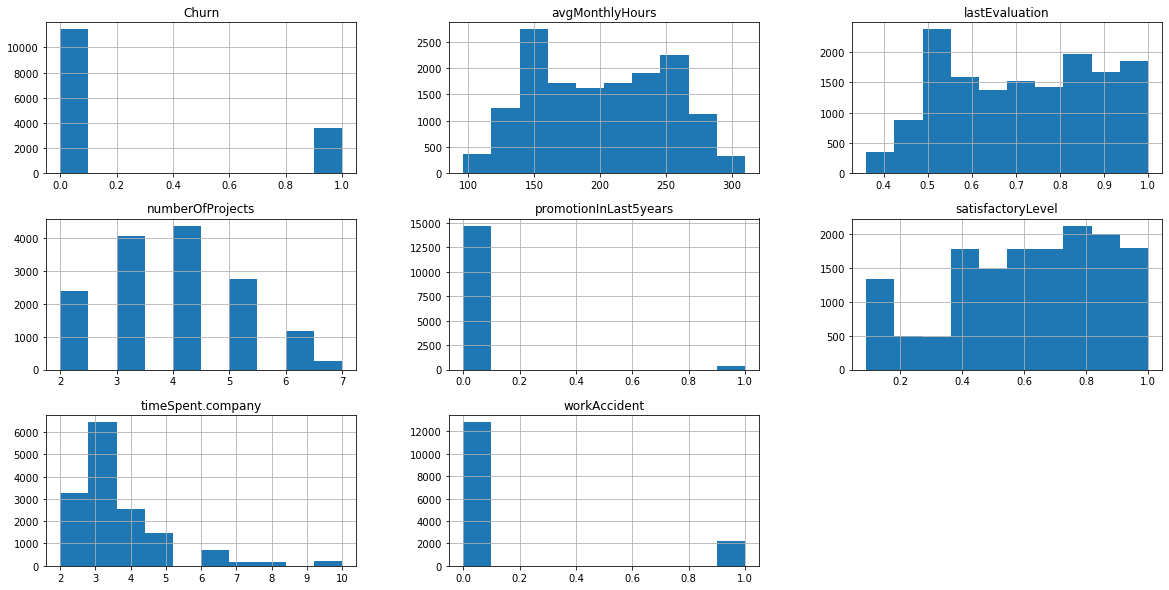

In [8]:
df.hist(figsize=(20,10))

In [9]:
df.dept.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'IT',
       'product_mng', 'marketing', 'management', 'RandD'], dtype=object)

In [10]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [11]:
salary=pd.get_dummies(df['salary'], drop_first=True)
df.drop(['salary'], axis=1, inplace=True)
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept,Churn
0,0.38,0.53,2,157,3,0,0,sales,1
1,0.80,0.86,5,262,6,0,0,sales,1
2,0.11,0.88,7,272,4,0,0,sales,1
3,0.37,0.52,2,159,3,0,0,sales,1
4,0.41,0.50,2,153,3,0,0,sales,1


In [12]:
df=pd.concat([df, salary], axis=1)
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept,Churn,low,medium
0,0.38,0.53,2,157,3,0,0,sales,1,1,0
1,0.80,0.86,5,262,6,0,0,sales,1,0,1
2,0.11,0.88,7,272,4,0,0,sales,1,0,1
3,0.37,0.52,2,159,3,0,0,sales,1,1,0
4,0.41,0.50,2,153,3,0,0,sales,1,1,0


In [13]:
df.dept.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

In [14]:
ordinal_label=df['dept'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'sales': 0,
 'technical': 1,
 'support': 2,
 'IT': 3,
 'product_mng': 4,
 'marketing': 5,
 'RandD': 6,
 'accounting': 7,
 'hr': 8,
 'management': 9}

In [15]:
df['dept']=df['dept'].map(g)
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept,Churn,low,medium
0,0.38,0.53,2,157,3,0,0,0,1,1,0
1,0.80,0.86,5,262,6,0,0,0,1,0,1
2,0.11,0.88,7,272,4,0,0,0,1,0,1
3,0.37,0.52,2,159,3,0,0,0,1,1,0
4,0.41,0.50,2,153,3,0,0,0,1,1,0


In [16]:
d=df.loc[:,df.columns!='Churn']
d['Churn']=df['Churn']
d.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept,low,medium,Churn
0,0.38,0.53,2,157,3,0,0,0,1,0,1
1,0.80,0.86,5,262,6,0,0,0,0,1,1
2,0.11,0.88,7,272,4,0,0,0,0,1,1
3,0.37,0.52,2,159,3,0,0,0,1,0,1
4,0.41,0.50,2,153,3,0,0,0,1,0,1


In [17]:
df=d
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept,low,medium,Churn
0,0.38,0.53,2,157,3,0,0,0,1,0,1
1,0.80,0.86,5,262,6,0,0,0,0,1,1
2,0.11,0.88,7,272,4,0,0,0,0,1,1
3,0.37,0.52,2,159,3,0,0,0,1,0,1
4,0.41,0.50,2,153,3,0,0,0,1,0,1


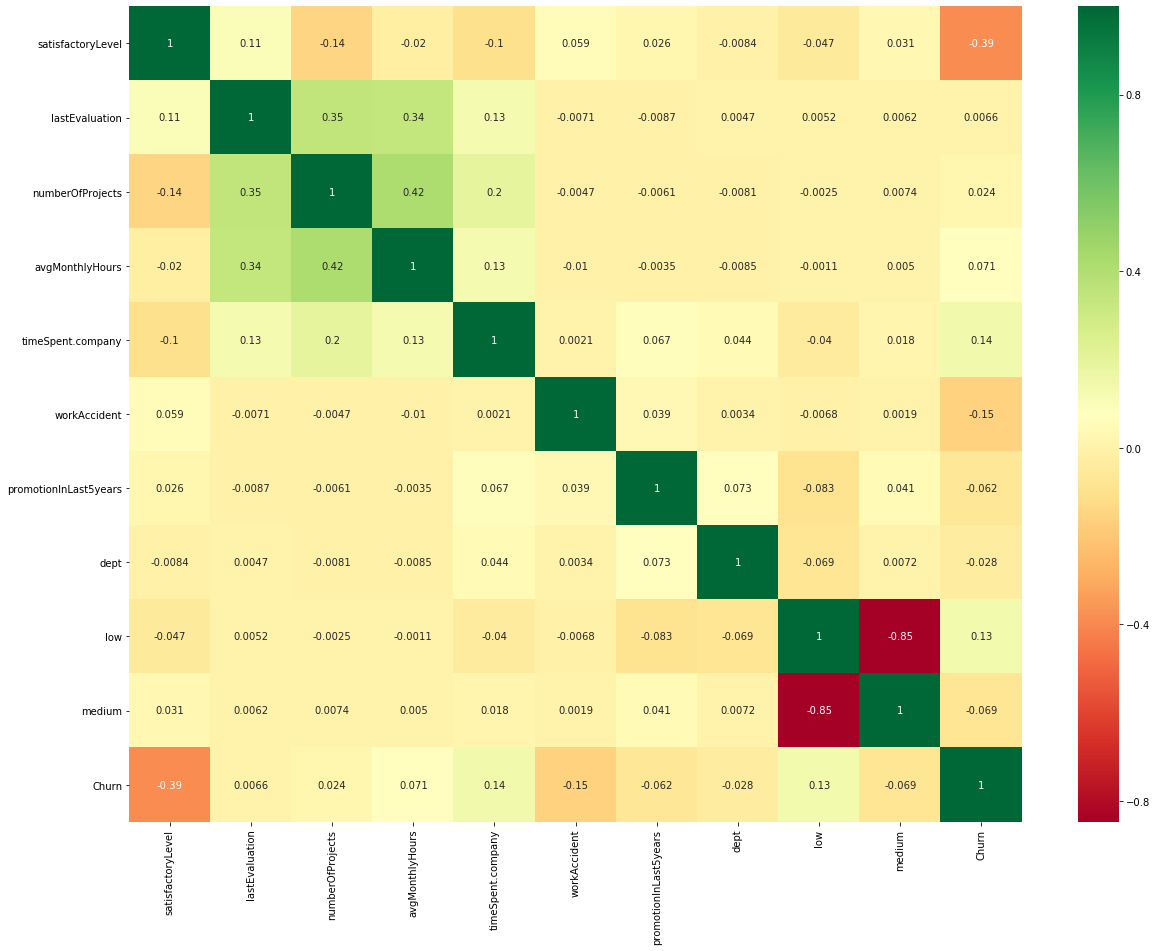

In [18]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), cmap = "RdYlGn", annot = True)

In [19]:
scale_data=[feature for feature in df.columns if feature not in ['Churn']]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[scale_data]=scaler.fit_transform(df[scale_data])
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept,low,medium,Churn
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,0.0,1.0,0.0,1
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,0.0,0.0,1.0,1
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,0.0,0.0,1.0,1
3,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,0.0,1.0,0.0,1
4,0.351648,0.218750,0.0,0.266355,0.125,0.0,0.0,0.0,1.0,0.0,1


In [20]:
x=df.drop(['Churn'], axis = 1)
y=df['Churn']
x.shape, y.shape

((14999, 10), (14999,))

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state = 3)

LOGISTIC REGRESSION

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2277
           1       0.62      0.33      0.43       723

    accuracy                           0.79      3000
   macro avg       0.72      0.63      0.65      3000
weighted avg       0.77      0.79      0.76      3000

[[2130  147]
 [ 487  236]]
accuracy is 0.7886666666666666


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
rfc_proba = clf.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, rfc_proba)
auc_score = auc(fpr, tpr)
auc_score

0.8210045612174424

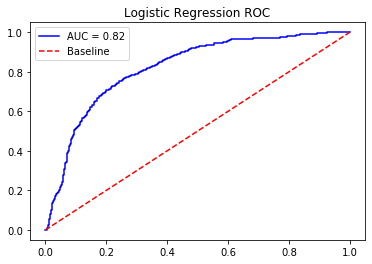

In [24]:
baseline_x =[0,0]
baseline_y =[1,1]
plt.title("Logistic Regression ROC")
plt.plot(fpr, tpr,"b",label = "AUC = %.2f" % auc_score)
plt.plot([0,1], "r--",label = "Baseline")
plt.legend()

KNN CLASSIFIER

In [25]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2277
           1       0.90      0.92      0.91       723

    accuracy                           0.95      3000
   macro avg       0.93      0.94      0.94      3000
weighted avg       0.96      0.95      0.96      3000

[[2199   78]
 [  57  666]]
accuracy is 0.955


In [27]:
rfc_proba = clf.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, rfc_proba)
auc_score = auc(fpr, tpr)
auc_score

0.9802140716807866

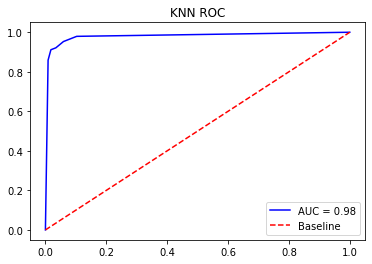

In [28]:
baseline_x =[0,0]
baseline_y =[1,1]
plt.title("KNN ROC")
plt.plot(fpr, tpr,"b",label = "AUC = %.2f" % auc_score)
plt.plot([0,1], "r--",label = "Baseline")
plt.legend()

Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      2277
           1       0.58      0.78      0.66       723

    accuracy                           0.81      3000
   macro avg       0.75      0.80      0.77      3000
weighted avg       0.84      0.81      0.82      3000

[[1869  408]
 [ 162  561]]
accuracy is 0.81


In [31]:
rfc_proba = clf.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, rfc_proba)
auc_score = auc(fpr, tpr)
auc_score

0.858085940893085

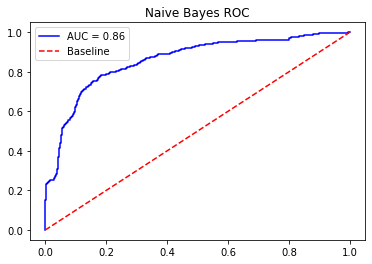

In [32]:
baseline_x =[0,0]
baseline_y =[1,1]
plt.title("Naive Bayes ROC")
plt.plot(fpr, tpr,"b",label = "AUC = %.2f" % auc_score)
plt.plot([0,1], "r--",label = "Baseline")
plt.legend()

DECISION TREE

In [33]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2277
           1       0.96      0.97      0.96       723

    accuracy                           0.98      3000
   macro avg       0.97      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

[[2246   31]
 [  24  699]]
accuracy is 0.9816666666666667


In [35]:
rfc_proba = clf.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, rfc_proba)
auc_score = auc(fpr, tpr)
auc_score

0.9765952871671797

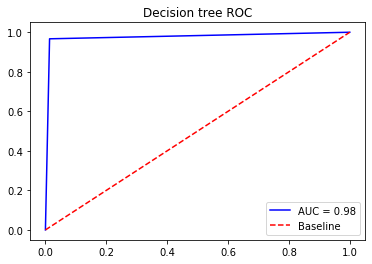

In [36]:
baseline_x =[0,0]
baseline_y =[1,1]
plt.title("Decision tree ROC")
plt.plot(fpr, tpr,"b",label = "AUC = %.2f" % auc_score)
plt.plot([0,1], "r--",label = "Baseline")
plt.legend()

RANDOM FOREST

In [37]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_leaf=2, random_state=1)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2277
           1       0.99      0.93      0.96       723

    accuracy                           0.98      3000
   macro avg       0.98      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000

[[2271    6]
 [  52  671]]
accuracy is 0.9806666666666667


In [39]:
rfc_proba = clf.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, rfc_proba)
auc_score = auc(fpr, tpr)
auc_score

0.9923262937875964

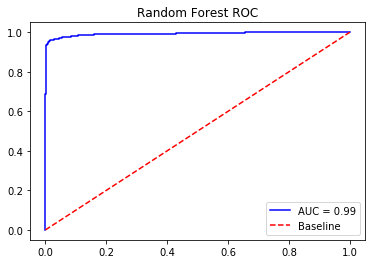

In [40]:
baseline_x =[0,0]
baseline_y =[1,1]
plt.title("Random Forest ROC")
plt.plot(fpr, tpr,"b",label = "AUC = %.2f" % auc_score)
plt.plot([0,1], "r--",label = "Baseline")
plt.legend()

ADABOOST 

In [41]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2277
           1       0.91      0.92      0.92       723

    accuracy                           0.96      3000
   macro avg       0.94      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000

[[2214   63]
 [  58  665]]
accuracy is 0.9596666666666667


In [43]:
rfc_proba = clf.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, rfc_proba)
auc_score = auc(fpr, tpr)
auc_score

0.9823303696657476

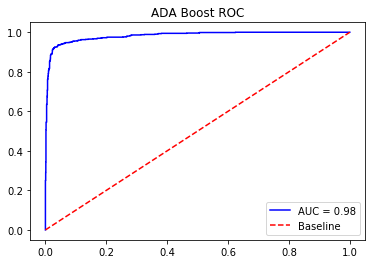

In [44]:
baseline_x =[0,0]
baseline_y =[1,1]
plt.title("ADA Boost ROC")
plt.plot(fpr, tpr,"b",label = "AUC = %.2f" % auc_score)
plt.plot([0,1], "r--",label = "Baseline")
plt.legend()

GRADIENT BOOSTING

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2277
           1       0.96      0.93      0.95       723

    accuracy                           0.97      3000
   macro avg       0.97      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000

[[2251   26]
 [  50  673]]
accuracy is 0.9746666666666667


In [47]:
rfc_proba = clf.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, rfc_proba)
auc_score = auc(fpr, tpr)
auc_score

0.9879737297200766

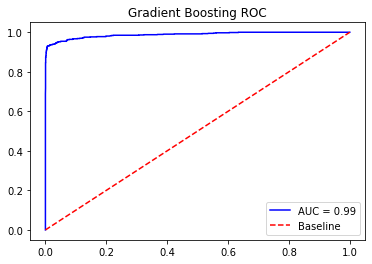

In [48]:
baseline_x =[0,0]
baseline_y =[1,1]
plt.title("Gradient Boosting ROC")
plt.plot(fpr, tpr,"b",label = "AUC = %.2f" % auc_score)
plt.plot([0,1], "r--",label = "Baseline")
plt.legend()

XGBOOST 

In [49]:
import xgboost
clf = xgboost.XGBClassifier()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2277
           1       0.98      0.97      0.97       723

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

[[2266   11]
 [  25  698]]
accuracy is 0.988


In [51]:
rfc_proba = clf.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, rfc_proba)
auc_score = auc(fpr, tpr)
auc_score

0.9936772256815555

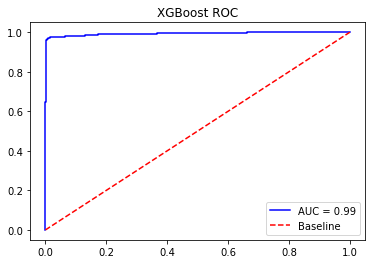

In [52]:
baseline_x =[0,0]
baseline_y =[1,1]
plt.title("XGBoost ROC")
plt.plot(fpr, tpr,"b",label = "AUC = %.2f" % auc_score)
plt.plot([0,1], "r--",label = "Baseline")
plt.legend()